In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("/content/drive/MyDrive/mammalia-raccoon-proximity.csv")

In [4]:
print(df.shape)

(1997, 4)


In [5]:
df.head()

From  target  weight  time
0     1       2      30     1
1     1       3     104     1
2     1       4       2     1
3     5       6     165     1
4     5       7     100     1

In [6]:
import networkx as nx #For network creation/analysis
import matplotlib.pyplot as plt #For plotting graphs
%matplotlib inline

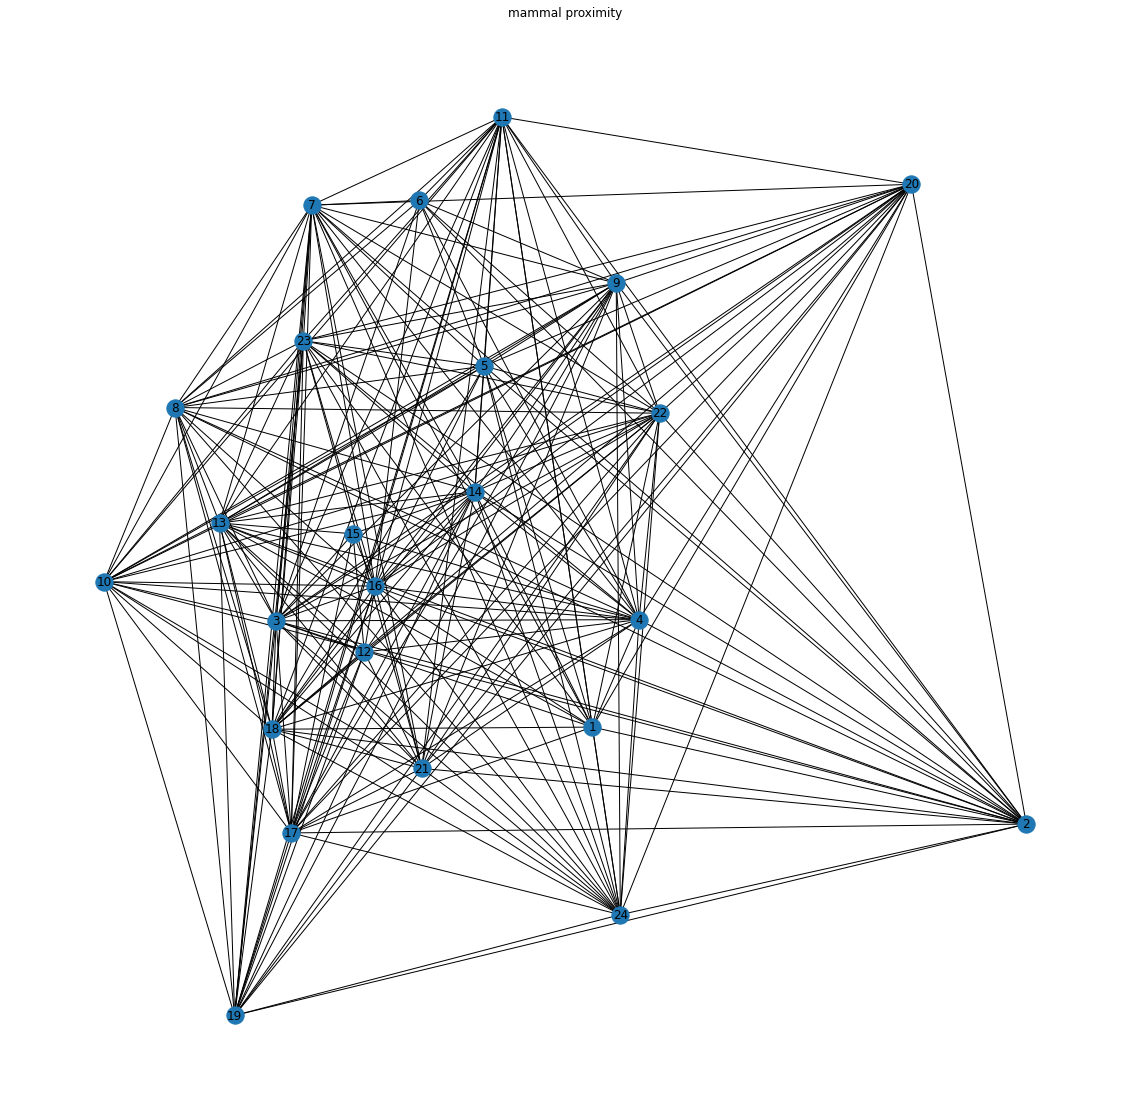

In [7]:
G = nx.from_pandas_edgelist(df, source='From', target = 'target',edge_attr='weight')
plt.subplots(figsize=(20,20))
plt.title('mammal proximity')
nx.draw_kamada_kawai(G, with_labels=True)

In [8]:
plt.savefig('gaa.png')

<Figure size 432x288 with 0 Axes>

In [9]:
nx.info(G)

'Graph with 24 nodes and 226 edges'

In [10]:
G.nodes()

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24))

In [11]:
len(G.edges())

226

In [12]:
G.edges

EdgeView([(1, 2), (1, 3), (1, 4), (1, 17), (1, 24), (1, 18), (1, 20), (1, 23), (1, 13), (1, 7), (1, 16), (1, 11), (1, 14), (1, 22), (1, 5), (2, 5), (2, 17), (2, 6), (2, 18), (2, 20), (2, 4), (2, 7), (2, 24), (2, 22), (2, 16), (2, 10), (2, 21), (2, 13), (2, 11), (2, 19), (2, 3), (2, 14), (2, 9), (2, 23), (2, 8), (3, 15), (3, 13), (3, 18), (3, 23), (3, 4), (3, 14), (3, 20), (3, 7), (3, 11), (3, 24), (3, 16), (3, 22), (3, 19), (3, 21), (3, 8), (3, 9), (3, 12), (3, 6), (3, 10), (3, 17), (4, 12), (4, 15), (4, 16), (4, 17), (4, 13), (4, 14), (4, 18), (4, 20), (4, 7), (4, 24), (4, 22), (4, 11), (4, 23), (4, 21), (4, 8), (4, 9), (4, 10), (4, 6), (4, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 24), (5, 16), (5, 20), (5, 14), (5, 13), (5, 18), (5, 23), (5, 22), (6, 9), (6, 11), (6, 7), (6, 8), (6, 16), (6, 22), (7, 9), (7, 17), (7, 11), (7, 19), (7, 18), (7, 20), (7, 23), (7, 16), (7, 22), (7, 24), (7, 8), (7, 10), (7, 21), (7, 13), (7, 14), (8, 11), (8, 9), (8, 19), (8, 14), (8, 2

In [13]:
G.degree(1)

15

CLUSTERING COEFFICIENT:

In [14]:
nx.algorithms.cluster.average_clustering(G)

0.9031933701005078

DEGREE CENTRALITY:

In [15]:
edgedata=[]
for i in range (1,25):
    weight=G.edges(i,data='weight')
    sum=0
    for j in weight:
      sum += j[2]
    edgedata.append(sum)
    sum=0
edge=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
res = {}
for key in edge:
    for value in edgedata:
        res[key] = value
        edgedata.remove(value)
        break
print(res)
sorted(res.items(), key=lambda x: x[1], reverse=True)

{1: 11288, 2: 244429, 3: 123321, 4: 956341, 5: 2156, 6: 32002, 7: 123597, 8: 4579, 9: 57236, 10: 57511, 11: 23524, 12: 128, 13: 147027, 14: 1253, 15: 40, 16: 3342, 17: 36498, 18: 51569, 19: 100806, 20: 10730, 21: 528234, 22: 240324, 23: 599657, 24: 6230}


[(4, 956341),
 (23, 599657),
 (21, 528234),
 (2, 244429),
 (22, 240324),
 (13, 147027),
 (7, 123597),
 (3, 123321),
 (19, 100806),
 (10, 57511),
 (9, 57236),
 (18, 51569),
 (17, 36498),
 (6, 32002),
 (11, 23524),
 (1, 11288),
 (20, 10730),
 (24, 6230),
 (8, 4579),
 (16, 3342),
 (5, 2156),
 (14, 1253),
 (12, 128),
 (15, 40)]

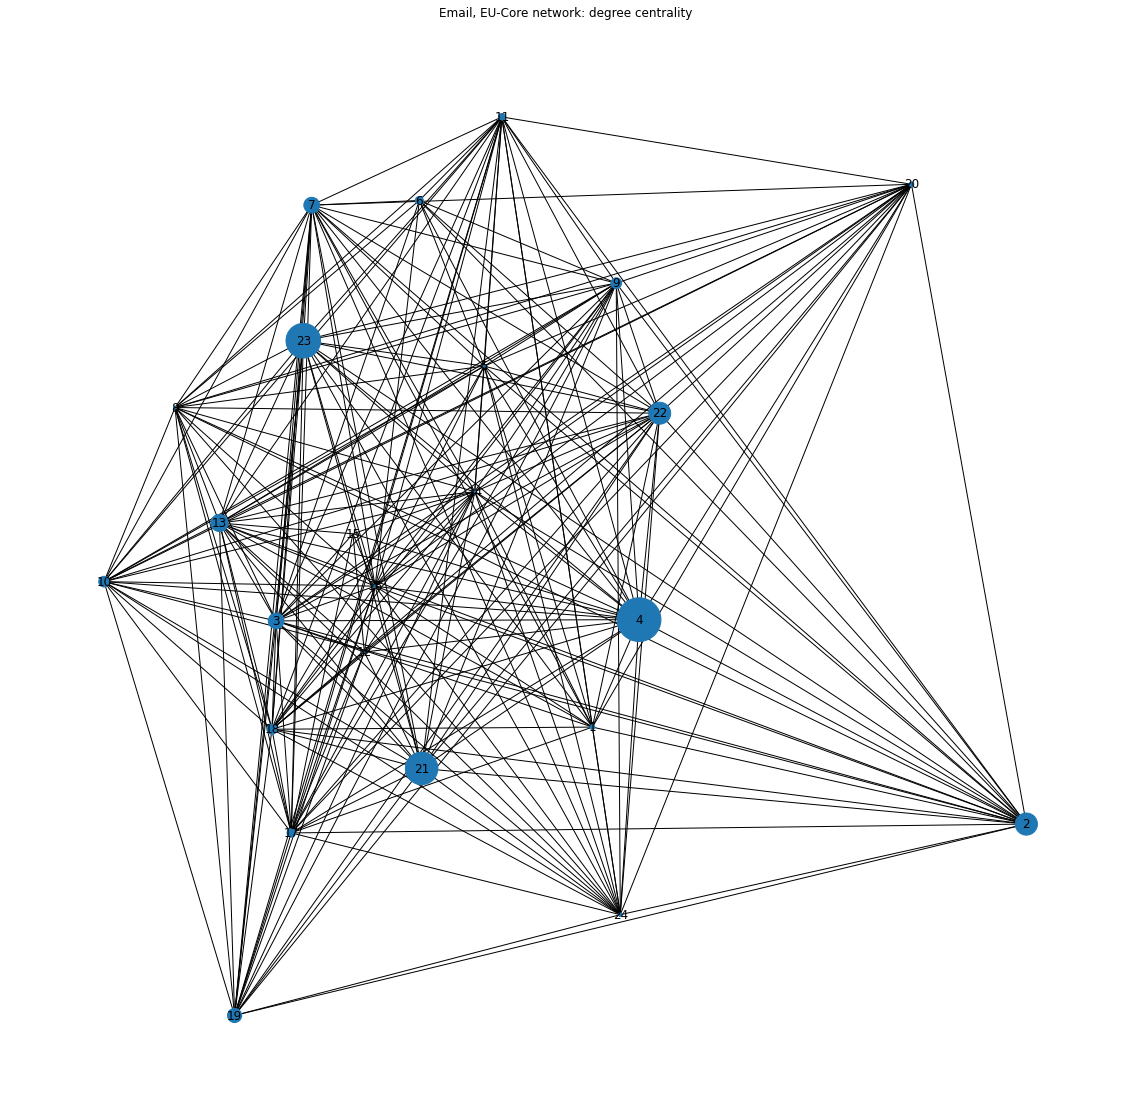

In [16]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
plt.subplots(figsize=(20,20))
plt.title('Email, EU-Core network: degree centrality')
nx.draw_kamada_kawai(G, with_labels=True, node_size=list(np.array(list(res.values()))/500))

[Text(0.5, 0, 'degree_centrality')]

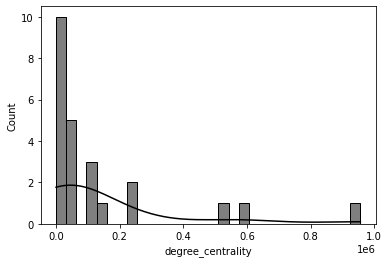

In [17]:
import seaborn as sns
deg=list(res.values())
sns.histplot(x=deg,kde=True,color='k',alpha=0.5,bins=30).set(xlabel='degree_centrality')

CLOSENESS CENTRALITY

In [18]:
G_distance_dict = {(e1, e2): 1 / weight for e1, e2, weight in G.edges(data='weight')}
nx.set_edge_attributes(G, G_distance_dict, 'distance')

In [19]:
closs_c=nx.closeness_centrality(G, distance='distance')
sorted(closs_c.items(), key=lambda x: x[1], reverse=True)

[(2, 204.79366575112326),
 (10, 204.66118305511912),
 (22, 204.64535112414626),
 (7, 203.74531956134143),
 (13, 203.5282714440535),
 (4, 203.47081693127765),
 (23, 203.38559450695615),
 (21, 203.37482365757847),
 (11, 202.8703067188598),
 (9, 202.7427972482784),
 (17, 202.4741870296576),
 (18, 202.32878942286607),
 (19, 198.36661952225487),
 (3, 198.02600417277188),
 (1, 197.66252912032206),
 (6, 196.90820769123968),
 (20, 191.34156900456566),
 (24, 190.9768726039375),
 (8, 175.217800656248),
 (16, 173.41640289947222),
 (5, 170.92144369995498),
 (14, 121.26765394501324),
 (12, 38.600161105265826),
 (15, 12.942284756348759)]

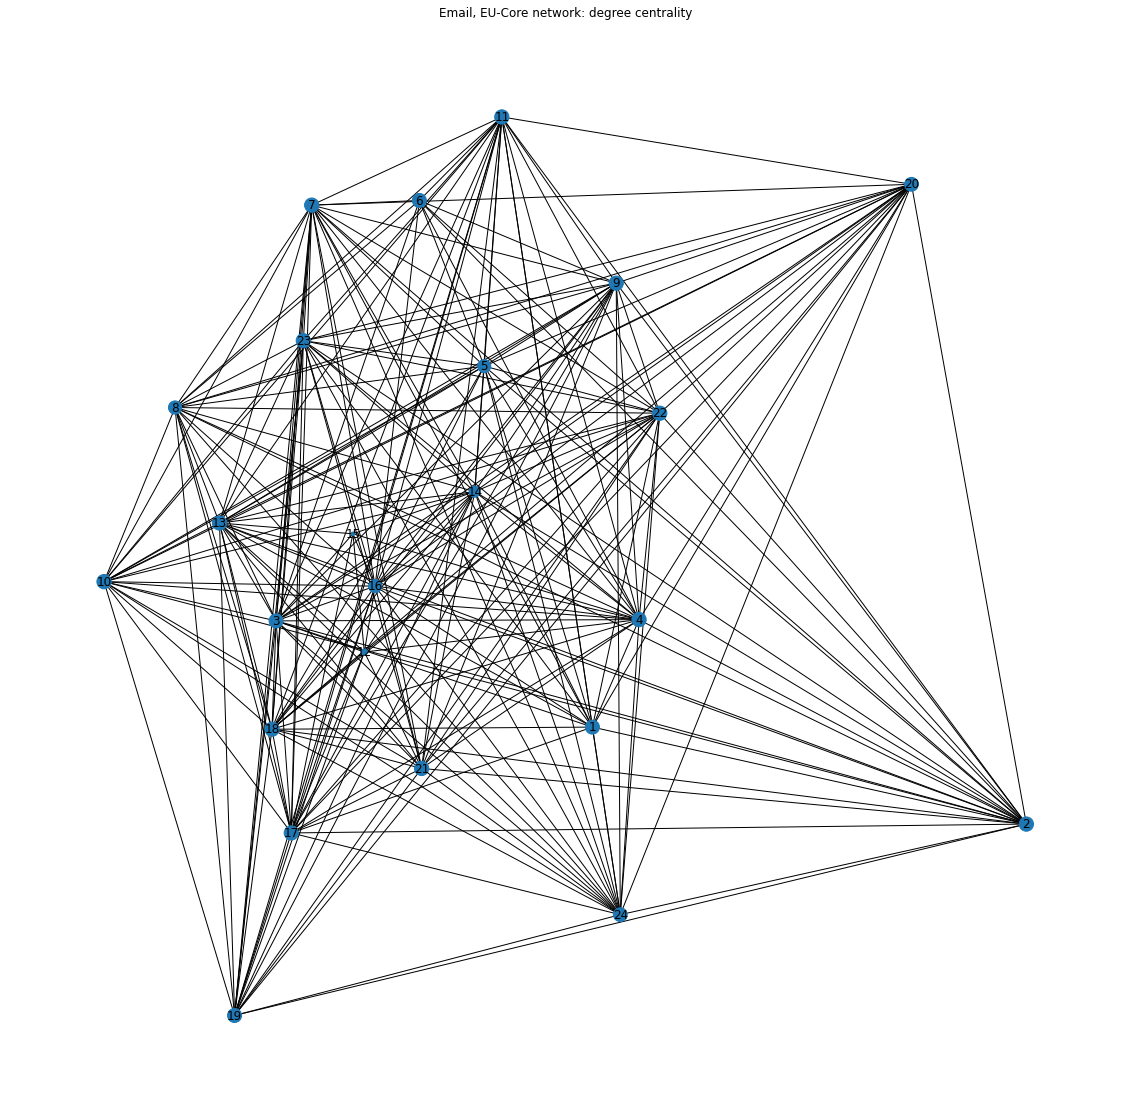

In [20]:
plt.subplots(figsize=(20,20))
plt.title('Email, EU-Core network: degree centrality')
nx.draw_kamada_kawai(G, with_labels=True, node_size=list(np.array(list(closs_c.values()))))

[Text(0.5, 0, 'closeness_centrality')]

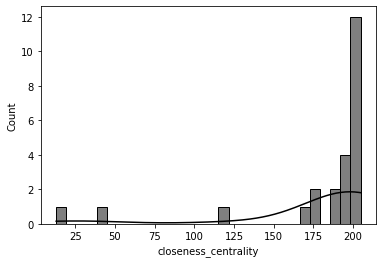

In [21]:
close_cent=closs_c.values()
sns.histplot(x=close_cent,kde=True,color='k',alpha=0.5,bins=30).set(xlabel='closeness_centrality')

BETWEENESS CENTRALITY:

In [22]:
betweenness_centrality_weighted = nx.betweenness_centrality(G, weight='weight')
bet_cent=betweenness_centrality_weighted.values()

In [23]:
for node in sorted(betweenness_centrality_weighted, key=betweenness_centrality_weighted.get, reverse=True):
  print(node, betweenness_centrality_weighted[node])

16 0.31225296442687744
15 0.2628458498023715
12 0.24703557312252963
14 0.24703557312252963
5 0.11857707509881422
4 0.09683794466403162
6 0.09683794466403162
17 0.09486166007905138
13 0.06916996047430829
9 0.04545454545454545
18 0.043478260869565216
23 0.043478260869565216
21 0.03359683794466403
1 0.023715415019762844
11 0.023715415019762844
7 0.01976284584980237
22 0.015810276679841896
8 0.01383399209486166
10 0.003952569169960474
2 0.0
3 0.0
19 0.0
20 0.0
24 0.0


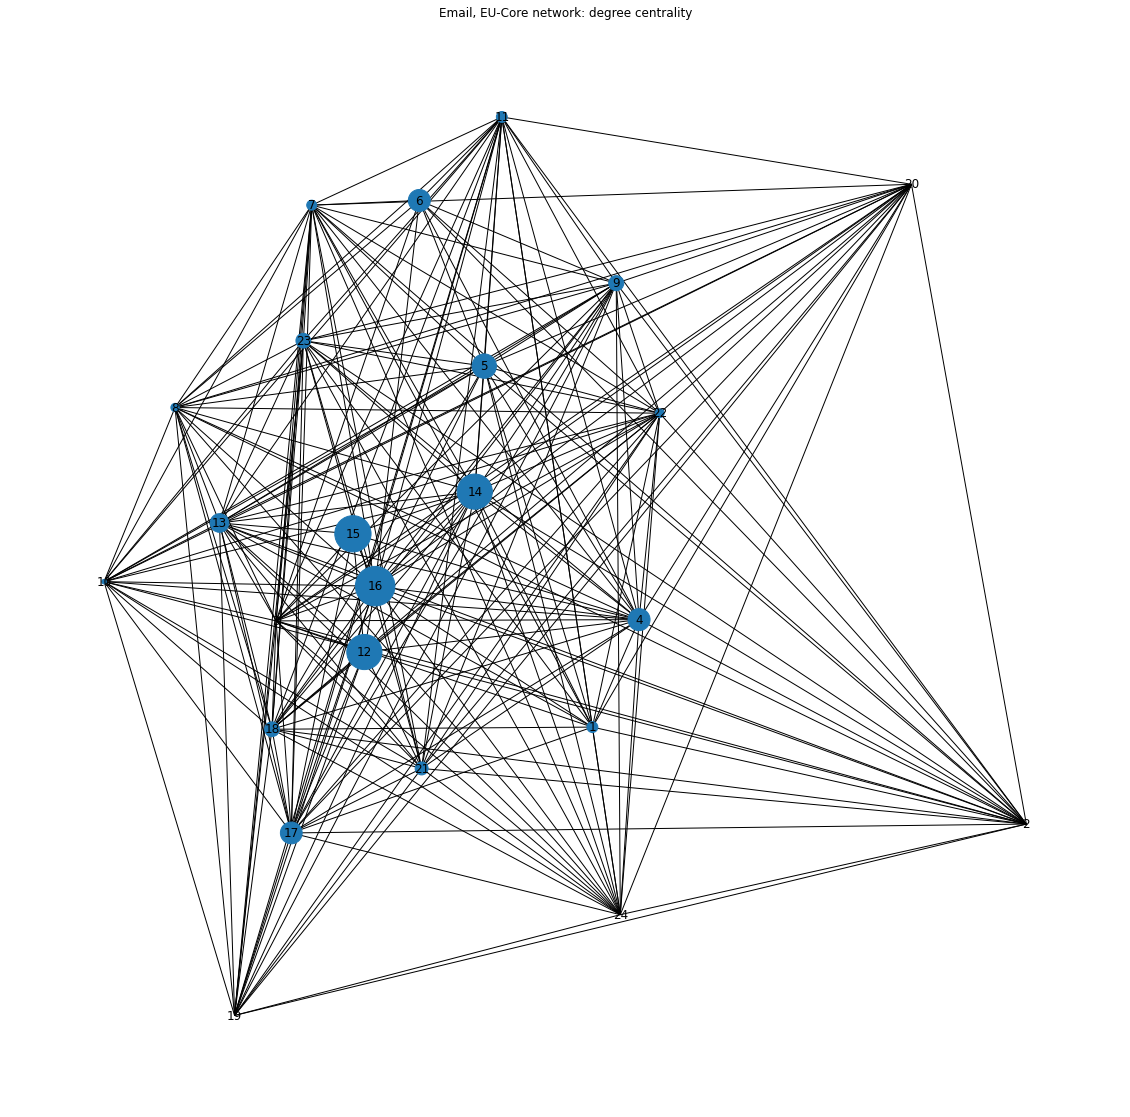

In [24]:
plt.subplots(figsize=(20,20))
plt.title('Email, EU-Core network: degree centrality')
nx.draw_kamada_kawai(G, with_labels=True, node_size=list(np.array(list(betweenness_centrality_weighted.values()))*5000))

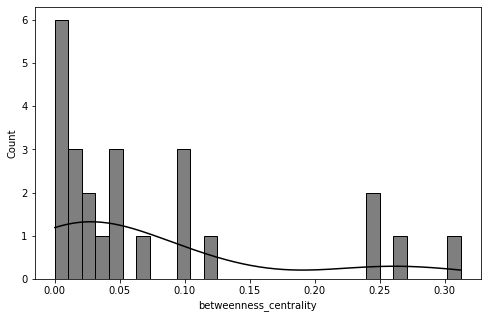

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(x=bet_cent,kde=True,color='k',alpha=0.5,bins=30).set(xlabel='betweenness_centrality')
plt.show()

CLUSTERING CENTRALITY

In [26]:
n=len(G.nodes)+1
cluster=[]
adjacency_matrix=np.zeros([n,n],dtype=float)
edges=list(G.edges())
for i in edges:
    adjacency_matrix[int(i[0])][int(i[1])]=1
print('\n')
print("**********The adjacency matrix is given by**********\n")
print(adjacency_matrix)
print('\n')
print("********** CLUSTERING COEFFICIENT OF EACH NODE **********")
print('\n')
for i in range(len(adjacency_matrix)):
    neighbours=adjacency_matrix[i].sum()
    clust=((2*neighbours)/(n*(n-1)))
    cluster.append(clust)
    if(clust>0):
        print(f"The clustering coefficient of node {i} is {clust}")
print('\n')
print("********** THE CLUSTERING COEFFEICIENT OF THE LEFT OUT NODES IS ZERO **********")



**********The adjacency matrix is given by**********

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1.
  1.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
  1.]
 [0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
  1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1.
  1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
  1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1.
  1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
  1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
  1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1.

In [27]:
print(cluster)

[0.0, 0.05, 0.06666666666666667, 0.06666666666666667, 0.06333333333333334, 0.04666666666666667, 0.02, 0.05, 0.043333333333333335, 0.043333333333333335, 0.04, 0.03666666666666667, 0.03, 0.03666666666666667, 0.03333333333333333, 0.006666666666666667, 0.02666666666666667, 0.023333333333333334, 0.02, 0.016666666666666666, 0.013333333333333334, 0.01, 0.006666666666666667, 0.0033333333333333335, 0.0]


In [28]:
clu={}
edge_clu=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
for key in edge_clu:
    for value in cluster:
        clu[key] = value
        cluster.remove(value)
        break
print(clu)

{0: 0.0, 1: 0.05, 2: 0.06666666666666667, 3: 0.06666666666666667, 4: 0.06333333333333334, 5: 0.04666666666666667, 6: 0.02, 7: 0.05, 8: 0.043333333333333335, 9: 0.043333333333333335, 10: 0.04, 11: 0.03666666666666667, 12: 0.03, 13: 0.03666666666666667, 14: 0.03333333333333333, 15: 0.006666666666666667, 16: 0.02666666666666667, 17: 0.023333333333333334, 18: 0.02, 19: 0.016666666666666666, 20: 0.013333333333333334, 21: 0.01, 22: 0.006666666666666667, 23: 0.0033333333333333335}


In [29]:
new_value = max(clu.values())
key_list = list(clu.keys())
val_list = list(clu.values())
position = val_list.index(new_value)
print("the maximum clustering coefficient is given by: ", new_value, "for the node" , key_list[position] )

the maximum clustering coefficient is given by:  0.06666666666666667 for the node 2


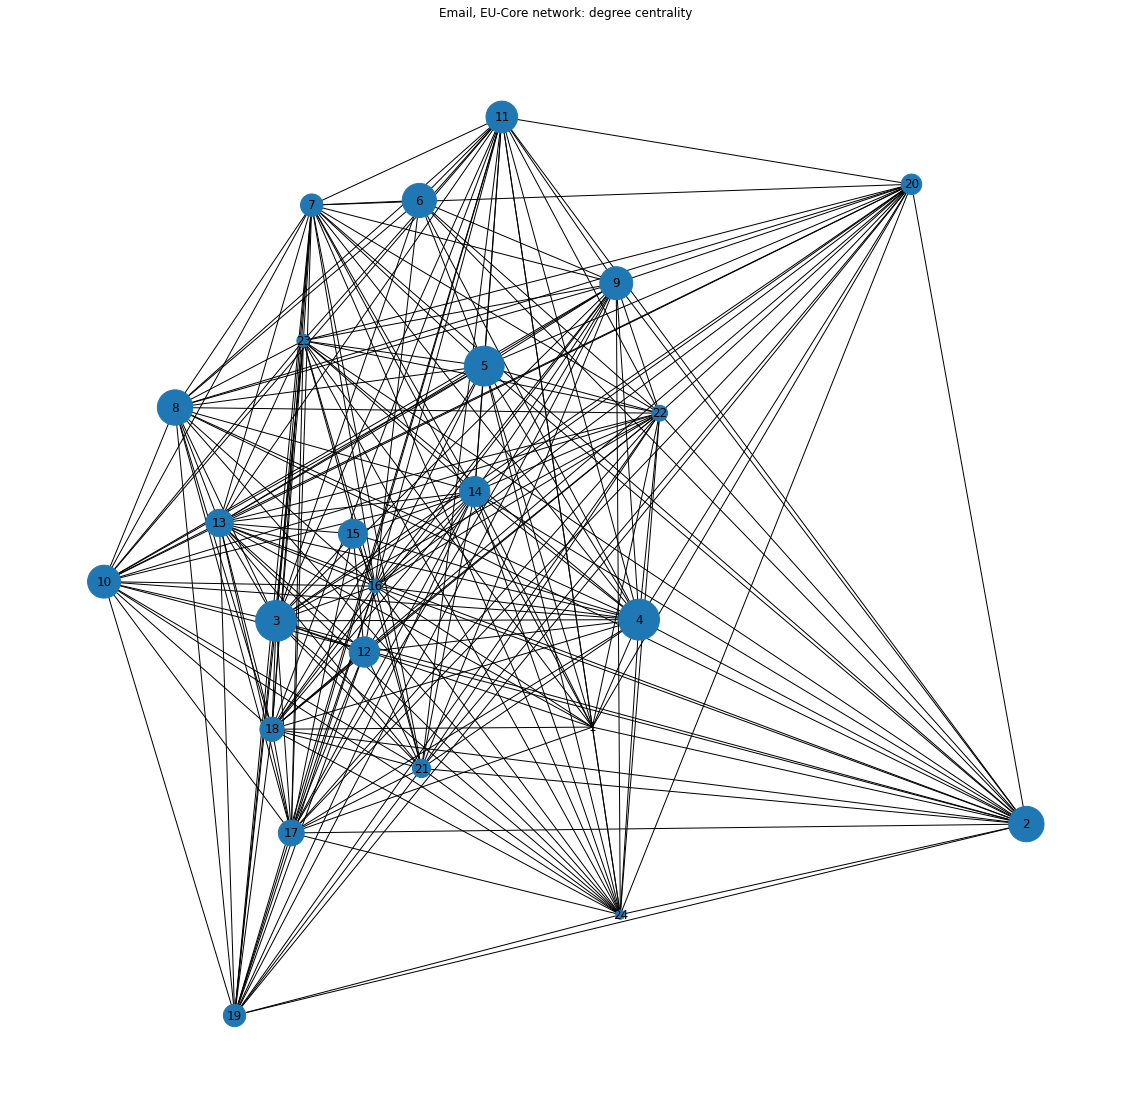

In [30]:
plt.subplots(figsize=(20,20))
plt.title('Email, EU-Core network: degree centrality')
nx.draw_kamada_kawai(G, with_labels=True, node_size=list(np.array(list(clu.values()))*25000))

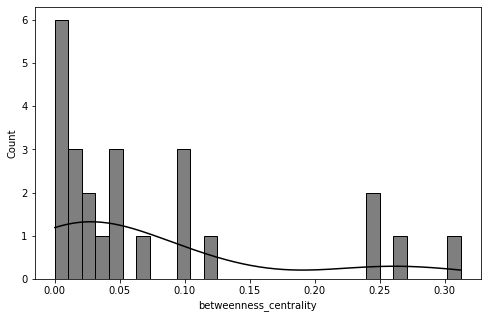

In [31]:
clus_coef=clu.values()
plt.figure(figsize=(8,5))
sns.histplot(x=bet_cent,kde=True,color='k',alpha=0.5,bins=30).set(xlabel='betweenness_centrality')
plt.show()

EIGENVECTOR CENTRALITY:

In [32]:
eigenvector_centrality_weighted = nx.eigenvector_centrality(G, weight='weight')

In [33]:
for node in sorted(eigenvector_centrality_weighted, key=eigenvector_centrality_weighted.get, reverse=True):
  print(node, eigenvector_centrality_weighted[node])

4 0.6742021857338013
23 0.5422080529538386
21 0.49741553208343736
9 0.05368098326768007
10 0.03383647349874086
19 0.0017725477113193183
22 0.0015719912344405534
24 0.0012934786931137223
3 0.0010881750747848253
5 0.0010758674576531613
2 0.0010638096766298032
20 0.0007727249697573776
17 0.000747386018979088
11 0.0007188951278298675
7 0.0004365908814012529
16 0.00039601727210943543
18 0.00038559600679239015
13 0.000310136862716165
6 0.0001789736201727748
1 9.650582550869021e-05
8 8.570189255685156e-05
14 2.314101006596197e-05
12 7.4714500871929645e-06
15 5.940408652058897e-06


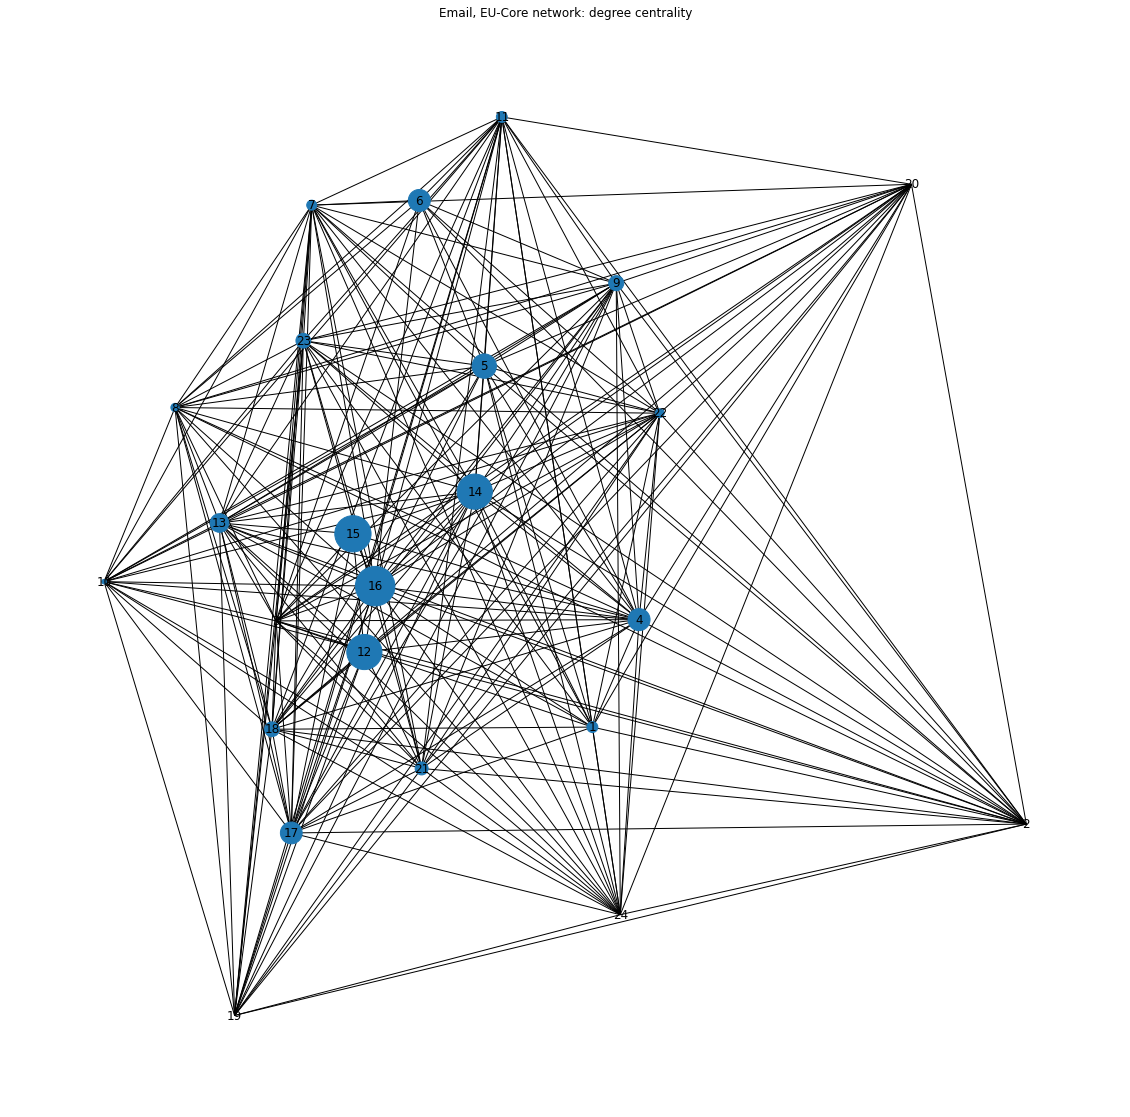

In [34]:
plt.subplots(figsize=(20,20))
plt.title('Email, EU-Core network: degree centrality')
nx.draw_kamada_kawai(G, with_labels=True, node_size=list(np.array(list(betweenness_centrality_weighted.values()))*5000))

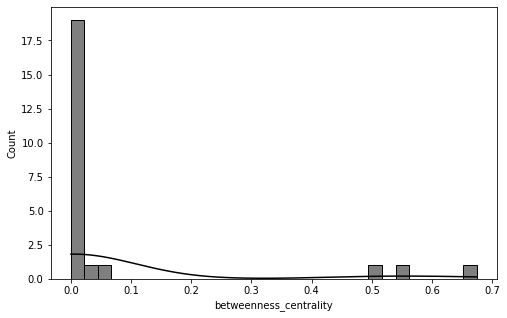

In [35]:
eig_cent=eigenvector_centrality_weighted.values()
plt.figure(figsize=(8,5))
sns.histplot(x=eig_cent,kde=True,color='k',alpha=0.5,bins=30).set(xlabel='betweenness_centrality')
plt.show()